In [2]:
# Our default parameters
# This cell has a "parameters" tag, means that it defines the parameters for use in the notebook
run_date = "2018-04-28"
source_id = 'sensor1'

In [13]:
import pandas as pd
import numpy as np
import papermill as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import time
import os
plt.ioff()

In [4]:
run_datetime = datetime.strptime(run_date, '%Y-%m-%d')
ts = pd.date_range("00:00", "23:59", freq="5min")
td = ts - timedelta((datetime.now() - run_datetime).days)
data = pd.DataFrame(np.random.randn(len(td)), columns=['mydata'])
data = data.rolling(70, min_periods=1, center=True).mean()  # Smooth it so it looks purdy
data['date'] = td
data['hour'] = data['date'].apply(lambda x: datetime.strftime(x, "%H"))

In [5]:
print(data['date'].describe())
data.describe()

count                     288
unique                    288
top       2018-04-28 08:45:00
freq                        1
first     2018-04-28 00:00:00
last      2018-04-28 23:55:00
Name: date, dtype: object


,mydata
count,288.000000
mean,-0.054130
std,0.077488
min,-0.220289
25%,-0.116715
50%,-0.063585
75%,-0.005831
max,0.113189


In [6]:
data = data.sort_values('date').set_index('date', drop=True)
data.head(5)

,mydata,hour
date,,
2018-04-28 00:00:00,-0.005883,00
2018-04-28 00:05:00,-0.006808,00
2018-04-28 00:10:00,-0.028420,00
2018-04-28 00:15:00,-0.027306,00
2018-04-28 00:20:00,-0.060171,00


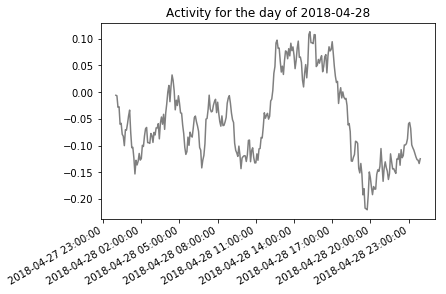

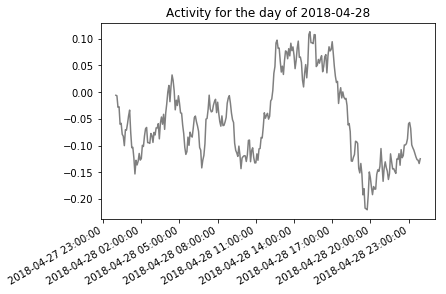

In [7]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
ax.plot(data.index, data['mydata'], c='k', alpha=.5)
ax.set(title="Activity for the day of {}".format(run_date))
pm.display('activity_day_fig', fig)

In [11]:
month_partition = run_datetime.strftime("%Y-%m")
output_file = "../data/output/step1/" + month_partition + "/" + run_date + '-' + source_id + '.csv'
print(output_file)

../data/output/step1/2018-04/2018-04-28-sensor1.csv


In [15]:
os.makedirs(os.path.dirname(output_file), exist_ok=True)
data.to_csv(output_file)